In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#from google.colab import drive
#drive.mount('/content/drive')
#water_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Water Quality Prediction.csv')

In [133]:
water_data = pd.read_csv('Water Quality Prediction.csv')

# DATA INFORMATION

In [134]:
pd.options.display.float_format = '{:.4f}'.format

In [135]:
water_data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.3330,0.0001,8.6058,122.7998,0.0000,3.4348,Colorless,0.0227,0.6073,...,3.7082,0.0000,332.1188,NaN,NaN,43.4933,January,29.0000,4.0000,0
1,1,6.9179,0.0001,3.7342,227.0299,0.0000,1.2453,Faint Yellow,0.0190,0.6229,...,3.2920,0.0000,284.6420,Lake,15.3490,71.2206,November,26.0000,16.0000,0
2,2,5.4438,0.0201,3.8170,230.9956,0.0000,0.5283,Light Yellow,0.3200,0.4234,...,3.5602,0.0701,570.0541,River,11.6435,44.8913,January,31.0000,8.0000,0
3,3,7.9553,0.1440,8.2249,178.1299,0.0000,4.0279,Near Colorless,0.1663,0.2085,...,3.5169,0.0247,100.0438,Ground,10.0924,60.8432,April,1.0000,21.0000,0
4,4,8.0919,0.0022,9.9258,186.5409,0.0000,3.8075,Light Yellow,0.0049,0.2229,...,3.1778,0.0033,168.0755,Spring,15.2494,69.3367,June,29.0000,7.0000,0


In [136]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Color                   1047594 non-null  object 
 8   Turbidity               1039881 non-null  float64
 9   Fluoride                1015357 non-null  float64
 10  Copper                  1013693 non-null  float64
 11  Odor                    1017243 non-null  float64
 12  Sulfate                 1014050 non-null  float64
 13  Conductivity            1019772 non-null  float64
 14  Ch

([<matplotlib.patches.Wedge at 0x321b75330>,
 [Text(-0.8260765699987563, 0.7263590713270468, 'Bad(0)'),
  Text(0.8260765359954333, -0.7263591099984813, 'Good(1)')],
 [Text(-0.4505872199993216, 0.39619585708748, '77.042%'),
  Text(0.45058720145205444, -0.3961958781809897, '22.958%')])

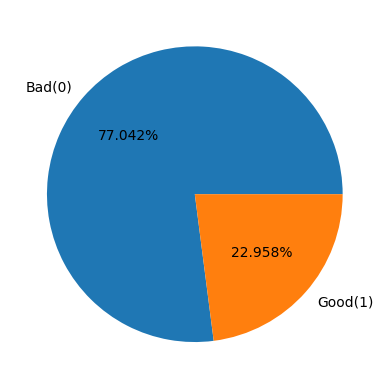

In [137]:
plt.pie(
    water_data['Target'].value_counts(),
    labels = ['Bad(0)','Good(1)'],
    autopct = "%1.3f%%",
)

# Filling Null Value

## Object Type

In [138]:
enc = water_data.select_dtypes(include='object')
enc

,Color,Source,Month
0,Colorless,NaN,January
1,Faint Yellow,Lake,November
2,Light Yellow,River,January
3,Near Colorless,Ground,April
4,Light Yellow,Spring,June
...,...,...,...
1048570,Near Colorless,Stream,March
1048571,Near Colorless,Lake,December
1048572,Near Colorless,Spring,June
1048573,Near Colorless,Well,May


In [139]:
for column in enc:
  enc_mode = water_data[column].mode()[0]
  water_data[column].fillna(enc_mode,inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_1080/582715426.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[column].fillna(enc_mode,inplace = True)


In [140]:
water_data.isna().sum()

Index                         0
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                         0
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                        0
Water Temperature         29688
Air Temperature            5303
Month                         0
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

## Numerical Datatype

In [141]:
numerical_data = water_data.select_dtypes(include=['float64','int64'])
numerical_data = numerical_data.drop(columns = ['Target','Day','Time of Day'], axis = 1)
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Turbidity               1039881 non-null  float64
 8   Fluoride                1015357 non-null  float64
 9   Copper                  1013693 non-null  float64
 10  Odor                    1017243 non-null  float64
 11  Sulfate                 1014050 non-null  float64
 12  Conductivity            1019772 non-null  float64
 13  Chlorine                1038413 non-null  float64
 14  Ma

In [142]:
for column in numerical_data:
  mean_value = water_data[column].mean()
  water_data[column].fillna(mean_value, inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_1080/2336187354.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[column].fillna(mean_value, inplace = True)


In [143]:
water_data.isna().sum()

Index                         0
pH                            0
Iron                          0
Nitrate                       0
Chloride                      0
Lead                          0
Zinc                          0
Color                         0
Turbidity                     0
Fluoride                      0
Copper                        0
Odor                          0
Sulfate                       0
Conductivity                  0
Chlorine                      0
Manganese                     0
Total Dissolved Solids        0
Source                        0
Water Temperature             0
Air Temperature               0
Month                         0
Day                       17549
Time of Day               20361
Target                        0
dtype: int64

## For Mode value

In [144]:
mode_value = ['Day', 'Time of Day']
for column in mode_value:
  mode_data = water_data[column].mode()[0]
  water_data[column].fillna(mode_data, inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_1080/2306118897.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_data[column].fillna(mode_data, inplace = True)


In [145]:
water_data.isna().sum()

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

# LABEL ENCODER

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
scaler = LabelEncoder()

In [148]:
for value in enc:
  water_data[value+'ENC'] = scaler.fit_transform(water_data[value])

In [149]:
colorenc = water_data['ColorENC'].value_counts()
color = water_data['Color'].value_counts()
print(color)
print(colorenc)

Color
Colorless         327014
Near Colorless    325799
Faint Yellow      188039
Light Yellow      124775
Yellow             82948
Name: count, dtype: int64
ColorENC
0    327014
3    325799
1    188039
2    124775
4     82948
Name: count, dtype: int64


In [129]:
water_data = water_data.drop(columns = ['Color', 'Source', 'Month'])

In [130]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1048575 non-null  float64
 2   Iron                    1048575 non-null  float64
 3   Nitrate                 1048575 non-null  float64
 4   Chloride                1048575 non-null  float64
 5   Lead                    1048575 non-null  float64
 6   Zinc                    1048575 non-null  float64
 7   Turbidity               1048575 non-null  float64
 8   Fluoride                1048575 non-null  float64
 9   Copper                  1048575 non-null  float64
 10  Odor                    1048575 non-null  float64
 11  Sulfate                 1048575 non-null  float64
 12  Conductivity            1048575 non-null  float64
 13  Chlorine                1048575 non-null  float64
 14  Ma

In [96]:
water_data.corr()['Target'].sort_values()

pH                       -0.032767
Time of Day              -0.001675
Water Temperature        -0.001253
SourceENC                -0.000487
Conductivity             -0.000470
Day                      -0.000177
MonthENC                  0.001632
Air Temperature           0.002529
Index                     0.003557
Lead                      0.042539
Zinc                      0.081962
Total Dissolved Solids    0.092149
Sulfate                   0.129420
ColorENC                  0.135263
Chlorine                  0.148835
Odor                      0.160840
Nitrate                   0.171432
Fluoride                  0.172829
Iron                      0.178193
Manganese                 0.197144
Chloride                  0.207777
Copper                    0.221141
Turbidity                 0.237234
Target                    1.000000
Name: Target, dtype: float64

In [97]:
X = water_data.drop(columns=['Time of Day', 'Water Temperature', 'SourceENC', 'Day', 'MonthENC', 'Air Temperature', 'Index', 'Conductivity', 'Target'])
y = water_data['Target']

In [98]:
X.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Chlorine', 'Manganese',
       'Total Dissolved Solids', 'ColorENC'],
      dtype='object')

In [106]:
X.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,ColorENC
count,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000,1048575.0000
mean,7.4499,0.1140,6.0786,181.8660,0.0013,1.5289,0.4836,0.9410,0.4939,1.7728,144.6009,3.2370,0.0935,264.7872,1.6659
std,0.8396,0.4418,3.1038,64.7924,0.0302,1.4854,0.8579,0.7798,0.5567,1.0355,65.6139,0.7116,0.4363,154.3477,1.3937
min,2.0580,0.0000,0.2862,29.4135,0.0000,0.0000,0.0000,0.0000,0.0000,0.0110,11.9407,0.9994,0.0000,0.0106,0.0000
25%,6.9260,0.0000,3.9831,138.6358,0.0000,0.4272,0.0377,0.3822,0.1319,0.9040,98.7047,2.7426,0.0000,131.8368,0.0000
50%,7.4499,0.0022,5.6283,177.0015,0.0000,1.1204,0.2039,0.7947,0.3570,1.7728,136.6283,3.2077,0.0006,263.6404,2.0000
75%,7.9897,0.0525,7.5399,214.2176,0.0000,2.1709,0.5881,1.2958,0.6638,2.5853,178.4131,3.6797,0.0159,394.9276,3.0000
max,12.8920,15.7486,73.0729,1430.5489,3.5039,28.3687,19.2961,12.8517,11.3906,4.1420,1393.4334,10.6884,23.7409,579.7995,4.0000


In [108]:
X['ColorENC'].value_counts()

ColorENC
0    327014
3    325799
1    188039
2    124775
4     82948
Name: count, dtype: int64

In [51]:
X.corrwith(y).sort_values()

pH                       -0.032767
Lead                      0.042539
Zinc                      0.081962
Total Dissolved Solids    0.092149
Sulfate                   0.129420
ColorENC                  0.135263
Chlorine                  0.148835
Odor                      0.160840
Nitrate                   0.171432
Fluoride                  0.172829
Iron                      0.178193
Manganese                 0.197144
Chloride                  0.207777
Copper                    0.221141
Turbidity                 0.237234
dtype: float64

In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, balanced_accuracy_score

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [54]:
y_train.value_counts()

Target
0    646273
1    192587
Name: count, dtype: int64

In [55]:
model = RandomForestClassifier()

In [56]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
y_pred = model.predict(X_test)

In [58]:
accuracy_score (y_test,y_pred)

0.8760222206327635

In [70]:
# F1 Score
f1 = f1_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Display the results
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

F1 Score: 0.7806
Precision: 0.6573
Recall: 0.9608
Balanced Accuracy: 0.9058


•High Recall, Lower Precision: Your model is very good at detecting positive cases, but it also has a significant number of false positives (as indicated by the lower precision).

•Balanced Accuracy is High: Despite the imbalance in your dataset, your model is handling both classes well.

•F1 Score is Moderate: While the F1 Score is not perfect, it reflects a reasonable balance between precision and recall.

In [72]:
# Extracting feature importances
importances = model.feature_importances_

# Associating importances with feature names
feature_names = X_train.columns  # If you're using a DataFrame
importance_dict = dict(zip(feature_names, importances))

# Sorting the features by importance
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

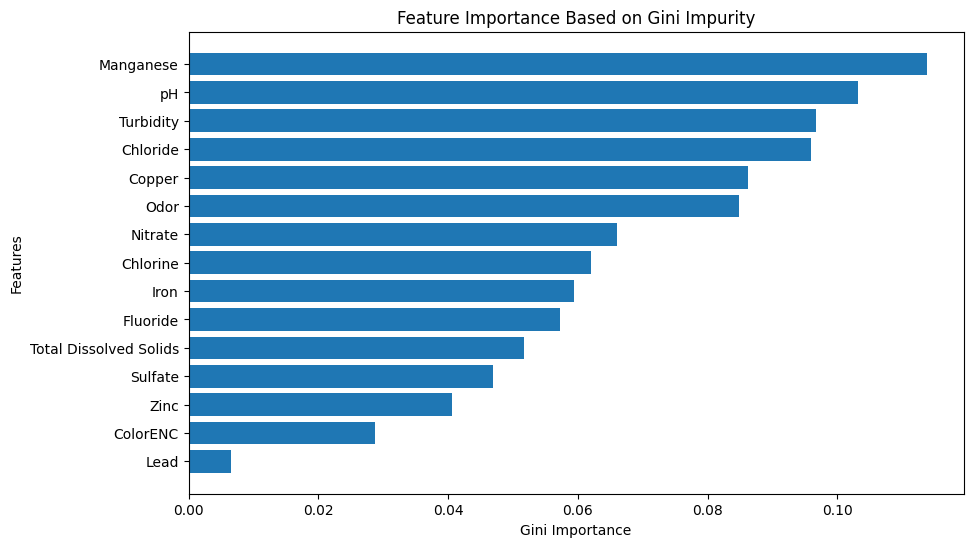

In [73]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Feature Importance Based on Gini Impurity')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

# SMOTE

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(random_state = 42)

In [61]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [62]:
y_train_smote.value_counts()

Target
0    646273
1    646273
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x16b08d2d0>,
 [Text(-1.1, 1.3471114790620887e-16, 'Bad(0)'),
  Text(1.1, -2.6942229581241775e-16, 'Good(1)')])

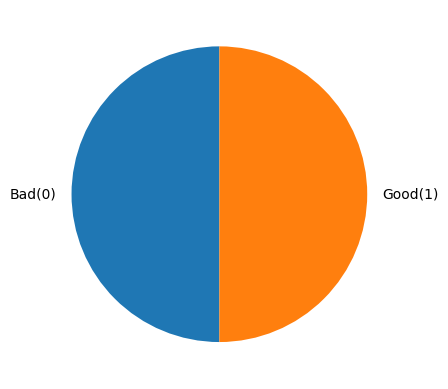

In [63]:
plt.pie(
    y_train_smote.value_counts(),
    labels = ['Bad(0)', 'Good(1)'],
    startangle=90,
)

In [64]:
rf_model = RandomForestClassifier()

In [65]:
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [66]:
y_pred_smote = rf_model.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred_smote)

0.8758124120830652

In [71]:
# F1 Score
f1 = f1_score(y_test, y_pred_smote)

# Precision
precision = precision_score(y_test, y_pred_smote)

# Recall
recall = recall_score(y_test, y_pred_smote)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_smote)

# Display the results
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

F1 Score: 0.7821
Precision: 0.6548
Recall: 0.9709
Balanced Accuracy: 0.9092


•Improved Recall: SMOTE has effectively increased your model’s ability to detect positive cases, which is a positive outcome if detecting positives is critical for your application.

•Slight Precision Drop: Although precision has slightly decreased, this is a common trade-off when improving recall, especially with SMOTE, which can sometimes introduce more false positives.

•Balanced Accuracy Improvement: The increase in balanced accuracy indicates that the overall model performance has improved, benefiting from the increased recall without a significant loss in precision.

In [75]:
# Extracting feature importances
importances = rf_model.feature_importances_

# Associating importances with feature names
feature_names = X_train.columns  # If you're using a DataFrame
importance_dict = dict(zip(feature_names, importances))

# Sorting the features by importance
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

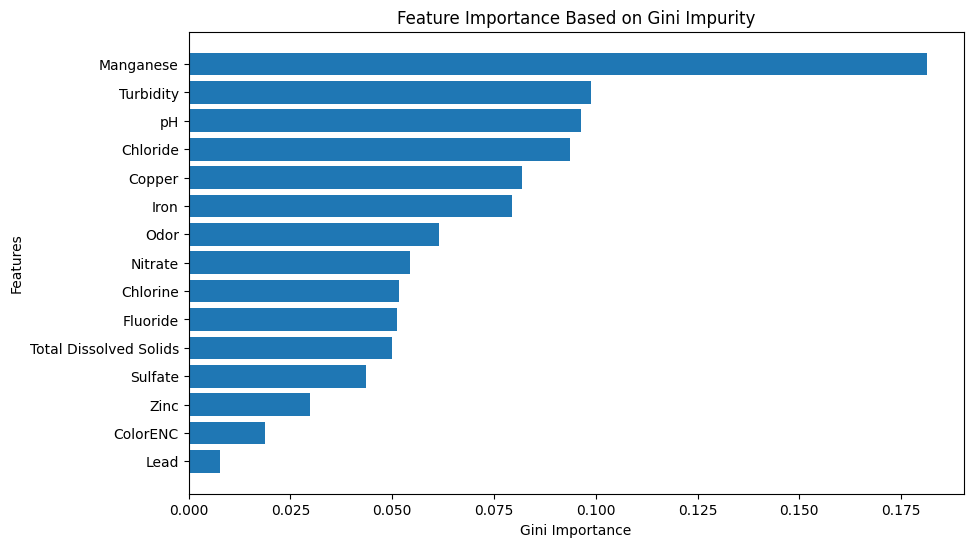

In [76]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])
plt.xlabel('Gini Importance')
plt.ylabel('Features')
plt.title('Feature Importance Based on Gini Impurity')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

In [42]:
gb_model = GradientBoostingClassifier()

In [43]:
gb_model.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier()

In [44]:
gb_predict = gb_model.predict(X_test)

In [45]:
accuracy_score(y_test, gb_predict)

0.8545883699306202

# NEW SMOTE

In [60]:
X_smote = water_data.drop('Target',axis=1)

In [72]:
X_smote_data, X_smote_test, y_smote_data, y_smote_test = train_test_split(X_smote,y,test_size=0.2,random_state=42,stratify=y)

In [70]:
smote_data = SMOTE(random_state = 42)

In [73]:
X_smote_train, y_smote_train = smote.fit_resample(X_smote_data,y_smote_data)

In [76]:
X_smote_train = X_smote_train.drop(columns=['Time of Day', 'Water Temperature', 'SourceENC', 'Day', 'MonthENC', 'Air Temperature', 'Index', 'Conductivity'])
X_smote_test = X_smote_test.drop(columns=['Time of Day', 'Water Temperature', 'SourceENC', 'Day', 'MonthENC', 'Air Temperature', 'Index', 'Conductivity'])

In [78]:
#rf_model1 = RandomForestClassifier()

In [79]:
#rf_model1.fit(X_smote_train, y_smote_train)

RandomForestClassifier()

In [88]:
#y_pred = rf_model1.predict(X_smote_test)

In [89]:
#accuracy_score(y_smote_test, y_pred)

0.875774265074029